# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


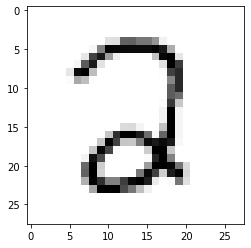

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24464214398775086
train accuracy is: 0.5481555666833584, test accuracy is 0.5509072580645161


Epoch 10 Loss 0.10554062596783202
train accuracy is: 0.9100317142380236, test accuracy is 0.9122983870967742


Epoch 20 Loss 0.062440398381452794
train accuracy is: 0.9360707728259056, test accuracy is 0.9440524193548387


Epoch 30 Loss 0.047349220624066116
train accuracy is: 0.9493406776831914, test accuracy is 0.9586693548387096


Epoch 40 Loss 0.04016598677224723
train accuracy is: 0.9558504423301619, test accuracy is 0.9647177419354839


Epoch 50 Loss 0.036033222505774856
train accuracy is: 0.958604573526957, test accuracy is 0.9682459677419355


Epoch 60 Loss 0.03330456540467759
train accuracy is: 0.9611083291604072, test accuracy is 0.96875


Epoch 70 Loss 0.03132547777211264
train accuracy is: 0.9627774995827074, test accuracy is 0.9702620967741935


Epoch 80 Loss 0.029784819054032262
train accuracy is: 0.9644466700050075, test accuracy is 0.969758064516129


Epoch 90 Loss 0.028541080669221362
train accuracy is: 0.9657820063428476, test accuracy is 0.9717741935483871


Epoch 100 Loss 0.027488648002494395
train accuracy is: 0.9672842597229178, test accuracy is 0.9707661290322581


Epoch 110 Loss 0.026598619458022544
train accuracy is: 0.9685361375396428, test accuracy is 0.9707661290322581


Epoch 120 Loss 0.025816047190712288
train accuracy is: 0.9692038057085628, test accuracy is 0.9707661290322581


Epoch 130 Loss 0.025121049719106673
train accuracy is: 0.9699549323985979, test accuracy is 0.9707661290322581


Epoch 140 Loss 0.024496659486545717
train accuracy is: 0.9705391420464029, test accuracy is 0.9707661290322581


Epoch 150 Loss 0.023934988821787177
train accuracy is: 0.9716241028208981, test accuracy is 0.9712701612903226


Epoch 160 Loss 0.023411452866149016
train accuracy is: 0.971957936905358, test accuracy is 0.9712701612903226


Epoch 170 Loss 0.02292823862179353
train accuracy is: 0.9726256050742781, test accuracy is 0.9712701612903226


Epoch 180 Loss 0.02247816457756674
train accuracy is: 0.9734601902854282, test accuracy is 0.9717741935483871


Epoch 190 Loss 0.022043973401165328
train accuracy is: 0.9740443999332332, test accuracy is 0.9717741935483871


Epoch 200 Loss 0.021638131040409132
train accuracy is: 0.9746286095810383, test accuracy is 0.9722782258064516


Epoch 210 Loss 0.021250133659672887
train accuracy is: 0.9752128192288433, test accuracy is 0.9712701612903226


Epoch 220 Loss 0.020878015461470494
train accuracy is: 0.9757135703555333, test accuracy is 0.9722782258064516


Epoch 230 Loss 0.020515727343206676
train accuracy is: 0.9759639459188784, test accuracy is 0.9722782258064516


Epoch 240 Loss 0.020177516320282227
train accuracy is: 0.9762977800033383, test accuracy is 0.9722782258064516


0.0020510494729418026

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2157940808174824
train accuracy is: 0.7839258888332499, test accuracy is 0.8109879032258065


Epoch 10 Loss 0.10030428646613371
train accuracy is: 0.9113670505758638, test accuracy is 0.9223790322580645


Epoch 20 Loss 0.07823404532662454
train accuracy is: 0.9264730428976798, test accuracy is 0.9380040322580645


Epoch 30 Loss 0.06781882667711235
train accuracy is: 0.9361542313470206, test accuracy is 0.9450604838709677


Epoch 40 Loss 0.06147858400412225
train accuracy is: 0.9408279085294609, test accuracy is 0.9501008064516129


Epoch 50 Loss 0.05712199265754167
train accuracy is: 0.9435820397262561, test accuracy is 0.954133064516129


Epoch 60 Loss 0.05390155817403936
train accuracy is: 0.9463361709230512, test accuracy is 0.9571572580645161


Epoch 70 Loss 0.05140203940026014
train accuracy is: 0.9476715072608913, test accuracy is 0.9576612903225806


Epoch 80 Loss 0.04938945430338544
train accuracy is: 0.9493406776831914, test accuracy is 0.9591733870967742


Epoch 90 Loss 0.047725648180507244
train accuracy is: 0.9510933066266066, test accuracy is 0.9596774193548387


Epoch 100 Loss 0.046319127360691256
train accuracy is: 0.9521782674011017, test accuracy is 0.9616935483870968


Epoch 110 Loss 0.045110934308977335
train accuracy is: 0.9530128526122517, test accuracy is 0.9621975806451613


Epoch 120 Loss 0.04405714038050225
train accuracy is: 0.9539308963445168, test accuracy is 0.9621975806451613


Epoch 130 Loss 0.043128682983624655
train accuracy is: 0.9547654815556669, test accuracy is 0.9637096774193549


Epoch 140 Loss 0.042301234305347844
train accuracy is: 0.9553496912034719, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.041557742016388774
train accuracy is: 0.9559339008512769, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.040884602143068806
train accuracy is: 0.9567684860624269, test accuracy is 0.9657258064516129


Epoch 170 Loss 0.04027144160917696
train accuracy is: 0.957519612752462, test accuracy is 0.9657258064516129


Epoch 180 Loss 0.03970965818308167
train accuracy is: 0.9579369053580371, test accuracy is 0.9667338709677419


Epoch 190 Loss 0.03919234466637732
train accuracy is: 0.958604573526957, test accuracy is 0.9667338709677419


Epoch 200 Loss 0.03871402602689009
train accuracy is: 0.9590218661325322, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.03826938317529266
train accuracy is: 0.9596060757803372, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.03785482707297158
train accuracy is: 0.9596895343014522, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.03746715642916766
train accuracy is: 0.9596895343014522, test accuracy is 0.9672379032258065


Epoch 240 Loss 0.03710325352327433
train accuracy is: 0.9599399098647972, test accuracy is 0.9672379032258065


0.04751496843511445

### Comparing results of NN and LR

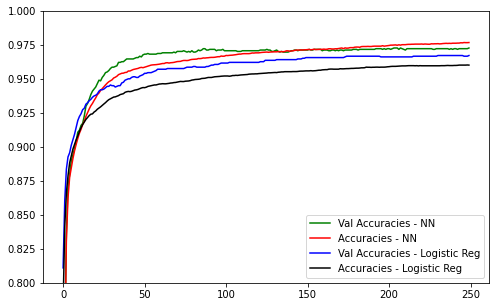

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

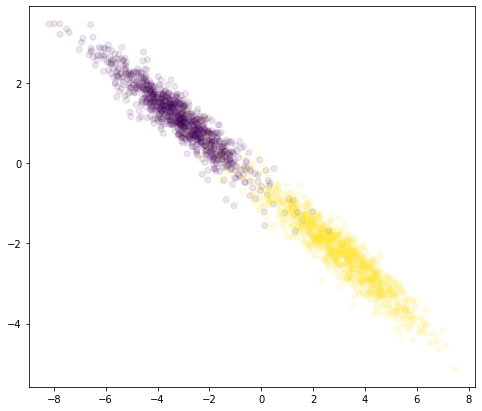

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

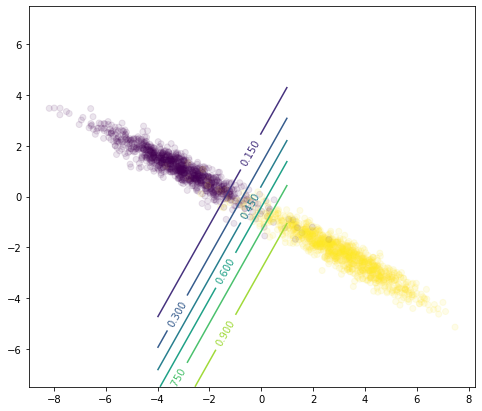

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );